# Tip problem

Mean MSE: 1.1908025830774818
Standard deviation: 0.4168832609688466
R^2: 0.3354233363864341
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


[Text(0.5, 0.875, 'total_bill <= 22.96\nsquared_error = 2.144\nsamples = 100.0%\nvalue = 3.071'),
 Text(0.25, 0.625, 'total_bill <= 16.28\nsquared_error = 0.765\nsamples = 70.5%\nvalue = 2.518'),
 Text(0.125, 0.375, 'total_bill <= 13.205\nsquared_error = 0.499\nsamples = 41.0%\nvalue = 2.116'),
 Text(0.0625, 0.125, 'squared_error = 0.534\nsamples = 24.0%\nvalue = 1.888'),
 Text(0.1875, 0.125, 'squared_error = 0.273\nsamples = 16.9%\nvalue = 2.438'),
 Text(0.375, 0.375, 'sex <= 0.5\nsquared_error = 0.597\nsamples = 29.5%\nvalue = 3.076'),
 Text(0.3125, 0.125, 'squared_error = 0.57\nsamples = 20.2%\nvalue = 2.942'),
 Text(0.4375, 0.125, 'squared_error = 0.53\nsamples = 9.3%\nvalue = 3.369'),
 Text(0.75, 0.625, 'total_bill <= 48.22\nsquared_error = 2.964\nsamples = 29.5%\nvalue = 4.392'),
 Text(0.625, 0.375, 'time <= 3.5\nsquared_error = 1.938\nsamples = 27.9%\nvalue = 4.146'),
 Text(0.5625, 0.125, 'squared_error = 1.768\nsamples = 14.8%\nvalue = 3.695'),
 Text(0.6875, 0.125, 'squared_err

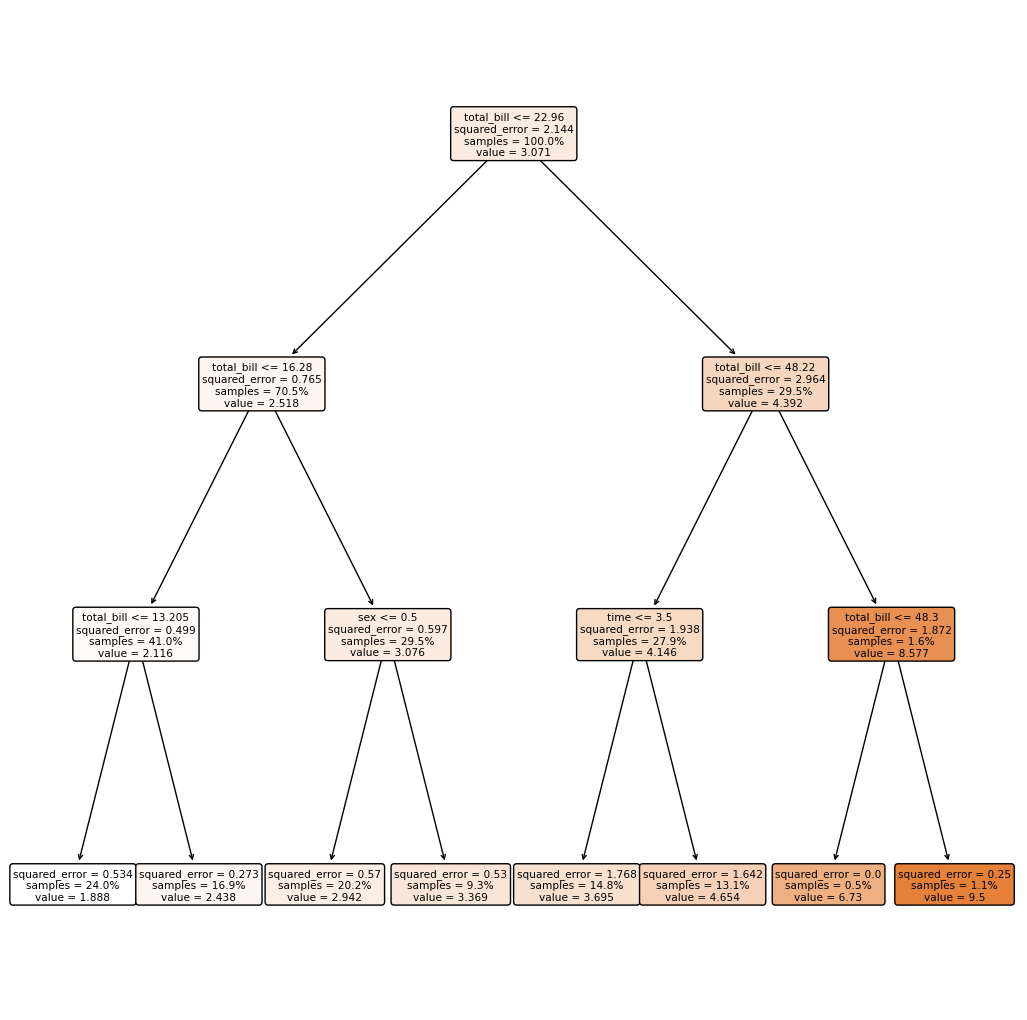

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("tips.csv")

weekday_to_number = {
    "Mon": 0,
    "Tue": 1,
    "Wed": 2,
    "Thur": 3,
    "Fri": 4,
    "Sat": 5,
    "Sun": 6
}

bx = data.drop(['tip'], axis=1)
bx[['sex']] = (bx[['sex']] == 'Male').astype(int)
bx[['smoker']] = (bx[['smoker']] == 'Yes').astype(int)
bx[['time']] = (bx[['time']] == "Dinner").astype(int)
bx['day'] = [weekday_to_number[day] for day in bx['day']]

by = data[['tip']]

repeats = 30
mses = []
r2s = []

for i in range(0, repeats):
    bx_train, bx_test, by_train, by_test = train_test_split(bx, by, test_size=0.25)

    dtm = DecisionTreeRegressor(max_depth=3)
    dtm.fit(bx_train, by_train)

    by_pred = dtm.predict(bx_test)
    mses.append(mean_squared_error(by_test, by_pred))
    r2s.append(r2_score(by_test, by_pred))

print("Mean MSE:", np.mean(mses))
print("Standard deviation:", np.std(mses))
print("R^2:", np.mean(r2s))

from sklearn import tree

plt.figure(figsize=(13, 13))
tree.plot_tree(dtm, feature_names=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], rounded=True, filled=True, proportion=True)